<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%EC%A7%80%EC%9B%90%EA%B1%B4%EC%88%98%EB%8C%80%EB%B9%84%ED%95%A9%EA%B2%A9%ED%9A%9F%EC%88%98_%EB%8C%80%ED%95%99%EB%B3%84%ED%95%A9%EA%B2%A9%EB%A5%A0_D%EA%B3%A0RPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 이 코드실행하고 런타임(runtime) 다시 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#pandas, openpyxl 라이브러리 부르기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import openpyxl
import csv

##  데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
path = '/content/drive/MyDrive/python/deungchon/'
df = pd.read_csv(f'{path}susi_jsi.csv', encoding = 'cp949')
#df = pd.read_csv(f'{path}susi_jsi_noname.csv', encoding = 'cp949')

In [ ]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import pandas as pd

# assume you have a pandas DataFrame called 'df' with columns including '대학'
uni = input("대학:")

# filter the DataFrame to only include rows where '대학' equals the user's input
uni_admissions = df[df['대학'] == uni]

# calculate the admission rate by dividing the number of rows where admission was granted by the total number of rows
admission_rate = (len(uni_admissions[uni_admissions['최종'] == '합']) / len(uni_admissions))*100

print(f"수시 {uni} 지원건수는 {len(uni_admissions):.1f}건")
print(f"수시 {uni} 합격건수는 {len(uni_admissions[uni_admissions['최종'] == '합']):.1f}건")
print("---------------------------------------------------------------------------------------")
print(f"수시 {uni} 지원건수 대비 합격률은 {admission_rate:.1f}%")

대학:숭실대
수시 숭실대 지원건수는 19.0건
수시 숭실대 합격건수는 2.0건
---------------------------------------------------------------------------------------
수시 숭실대 지원건수 대비 합격률은 10.5%


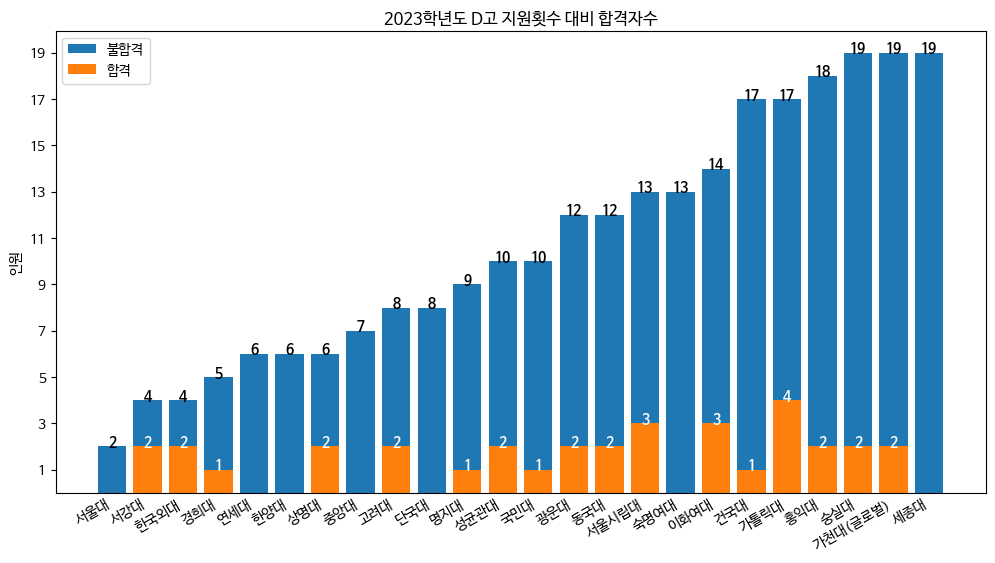

In [ ]:
#국숭세단, 광명상가(가톨릭대, 가천대)까지

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# assume you have a pandas DataFrame called 'df' with columns including '대학' and '최종'
uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대','숙명여대', '국민대', '숭실대', '세종대', '단국대', '광운대', '명지대', '상명대', '가천대(글로벌)', '가톨릭대']

# create a new DataFrame containing the number of applications and acceptance for each university and sort it in ascending order by number of applications
num_applications = []
num_acceptance = []
for u in uni:
    uni_admissions = df[df['대학'] == u]
    num_app = len(uni_admissions)
    num_acc = len(uni_admissions[uni_admissions['최종'] == '합'])
    num_applications.append(num_app)
    num_acceptance.append(num_acc)

admission_df = pd.DataFrame({'대학': uni, '지원 건수': num_applications, '합격 건수': num_acceptance})

#그래프를 오름차순으로 정렬하기
admission_df = admission_df.sort_values('지원 건수')

# create a vertical stacked bar plot of the number of applications and acceptance
plt.figure(figsize=(12,6))
plt.bar(x='대학', height= admission_df['지원 건수']- admission_df['합격 건수'], data=admission_df, bottom=admission_df['합격 건수'], label='불합격')
plt.bar(x='대학', height='합격 건수', data=admission_df, bottom=0, label='합격')
plt.xticks(rotation=30, ha='right')
plt.title('2023학년도 D고 지원횟수 대비 합격자수')
#plt.xlabel('대학')
plt.ylabel('인원')

# add labels on top of the bars for the number of accepted applicants
for i, v in enumerate(admission_df['합격 건수']):
    if v > 0:
        plt.text(i, v, str(v), color='white', ha='center', fontweight='bold')  #글자색 white
        #plt.text(i, v, str(v), color='black', ha='center', fontweight='bold') #글자색 black
for a, b in enumerate(admission_df['지원 건수']):
    if b > 0:
        plt.text(a, b, str(b), color='black', ha='center', fontweight='bold')

# modify the y-tick range to start from 1 instead of 0
plt.yticks(np.arange(1, 21, 2))

# X축 눈금(ticks) 제거
plt.tick_params(axis='x', which='both', length=0)


plt.legend()
plt.show()


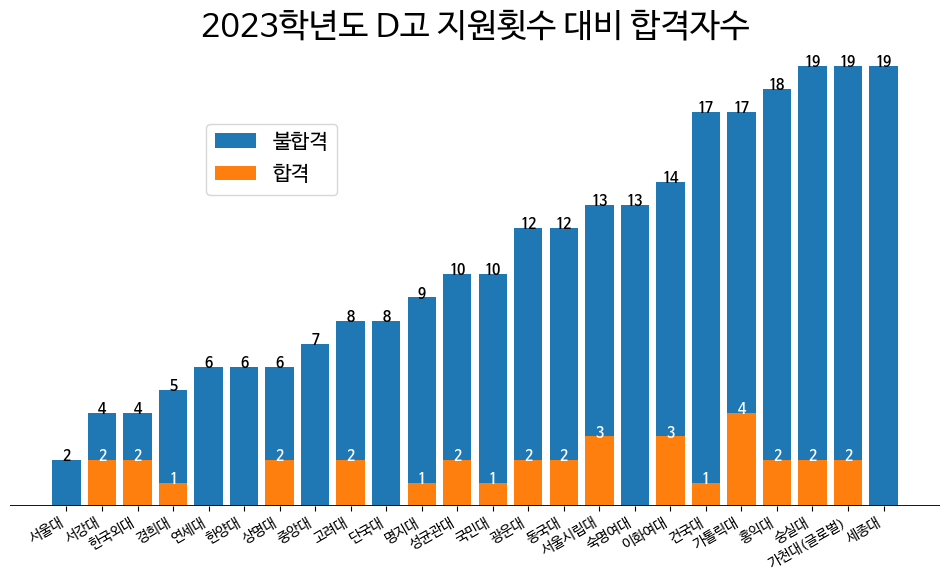

In [30]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# create a vertical stacked bar plot of the number of applications and acceptance
plt.figure(figsize=(12,6))
plt.bar(x='대학', height= admission_df['지원 건수']- admission_df['합격 건수'], data=admission_df, bottom=admission_df['합격 건수'], label='불합격')
plt.bar(x='대학', height='합격 건수', data=admission_df, bottom=0, label='합격')
plt.xticks(rotation=30, ha='right')
plt.title('2023학년도 D고 지원횟수 대비 합격자수', fontsize=24)


# add labels on top of the bars for the number of accepted applicants
for i, v in enumerate(admission_df['합격 건수']):
    if v > 0:
        plt.text(i, v, str(v), color='white', ha='center', fontweight='bold')  #글자색 white
        #plt.text(i, v, str(v), color='black', ha='center', fontweight='bold') #글자색 black
for a, b in enumerate(admission_df['지원 건수']):
    if b > 0:
        plt.text(a, b, str(b), color='black', ha='center', fontweight='bold')

# modify the y-tick range to start from 1 instead of 0
plt.yticks(np.arange(1, 21, 2))

#y축 제거
plt.yticks([]) 

# remove ticks and spines from the y-axis and top x-axis
plt.tick_params(axis='y', which='both', length=0)  # remove ticks from y-axis
#plt.tick_params(axis='x', which='both', length=0, top=False)  # remove ticks from top x-axis
plt.gca().spines['top'].set_visible(False)  # remove spine from top x-axis
plt.gca().spines['right'].set_visible(False)  # remove spine from right y-axis
plt.gca().spines['left'].set_visible(False)  # remove spine from right y-axis
plt.gca().spines['bottom'].set_visible(False)  # remove spine from right y-axis

# create a horizontal line on the x-axis
plt.axhline(y=0, color='black', linewidth=2)

# move the legend to the right and adjust its position
plt.legend(fontsize = 15, loc='upper left', bbox_to_anchor=(0.2, 0.85))


# adjust the spacing of the plot to make room for the legend
#plt.subplots_adjust(right=0.75)

plt.show()


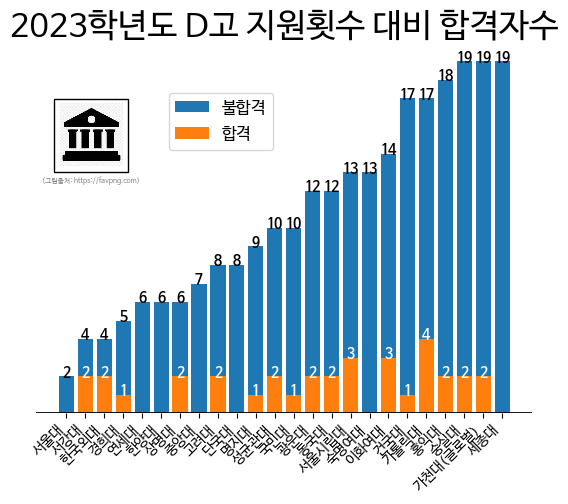

In [58]:
#대학 그림 들어간 그래프

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# load the PNG image
path = '/content/drive/MyDrive/python/deungchon/'
image = plt.imread(f'{path}uni.jpg')


#그래프 기본 틀 그리기
fig, ax = plt.subplots()


# add the image to the plot
im = OffsetImage(image, zoom=0.2) # adjust the zoom level as needed
ab = AnnotationBbox(im, (1.3, 15)) # adjust the coordinates as needed
ax.add_artist(ab)


# create a vertical stacked bar plot of the number of applications and acceptance
#plt.figure(figsize=(12,6))
plt.bar(x='대학', height= admission_df['지원 건수']- admission_df['합격 건수'], data=admission_df, bottom=admission_df['합격 건수'], label='불합격')
plt.bar(x='대학', height='합격 건수', data=admission_df, bottom=0, label='합격')
plt.xticks(rotation=45, ha='right')
plt.title('2023학년도 D고 지원횟수 대비 합격자수', fontsize=24)


# add labels on top of the bars for the number of accepted applicants
for i, v in enumerate(admission_df['합격 건수']):
    if v > 0:
        plt.text(i, v, str(v), color='white', ha='center', fontweight='bold')  #글자색 white
        #plt.text(i, v, str(v), color='black', ha='center', fontweight='bold') #글자색 black
for a, b in enumerate(admission_df['지원 건수']):
    if b > 0:
        plt.text(a, b, str(b), color='black', ha='center', fontweight='bold')

# modify the y-tick range to start from 1 instead of 0
plt.yticks(np.arange(1, 21, 2))

#y축 제거
plt.yticks([]) 

# remove ticks and spines from the y-axis and top x-axis
plt.tick_params(axis='y', which='both', length=0)  # remove ticks from y-axis
#plt.tick_params(axis='x', which='both', length=0, top=False)  # remove ticks from top x-axis
plt.gca().spines['top'].set_visible(False)  # remove spine from top x-axis
plt.gca().spines['right'].set_visible(False)  # remove spine from right y-axis
plt.gca().spines['left'].set_visible(False)  # remove spine from right y-axis
plt.gca().spines['bottom'].set_visible(False)  # remove spine from right y-axis

# create a horizontal line on the x-axis
plt.axhline(y=0, color='black', linewidth=2)

# move the legend to the right and adjust its position
plt.legend(fontsize = 12, loc='upper left', bbox_to_anchor=(0.25, 0.89))


# adjust the spacing of the plot to make room for the legend
#plt.subplots_adjust(right=0.75)

#caption 추가
plt.text(0.11, 0.63, '(그림출처: https://favpng.com)', ha='center', va='center', transform=ax.transAxes, fontsize=5,  color='gray')


plt.show()

In [ ]:
df_gch = df[df['대학'].str.contains('[가]+')]
print(df_gch)

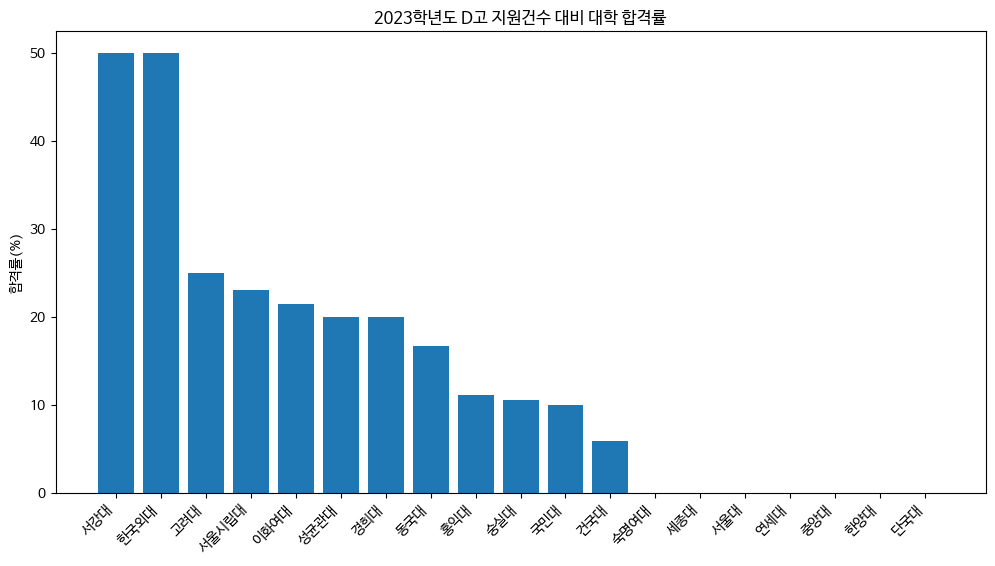

In [ ]:
#합격률 그래프

import pandas as pd
import matplotlib.pyplot as plt

# assume you have a pandas DataFrame called 'df' with columns including '대학' and '최종'
uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대','숙명여대', '국민대', '숭실대', '세종대', '단국대']

# create a new DataFrame containing the admission rates for each university and sort it in descending order by admission rate
admission_rates = []
for u in uni:
    uni_admissions = df[df['대학'] == u]
    rate = (len(uni_admissions[uni_admissions['최종'] == '합']) / len(uni_admissions))*100
    admission_rates.append(rate)
admission_df = pd.DataFrame({'대학': uni, '합격률': admission_rates})
admission_df = admission_df.sort_values('합격률', ascending=False)

# create a vertical bar plot of the admission rates
plt.figure(figsize=(12,6))
plt.bar(x='대학', height='합격률', data=admission_df)
plt.xticks(rotation=45, ha='right')
plt.title('2023학년도 D고 지원건수 대비 대학 합격률')
#plt.xlabel('대학')
plt.ylabel('합격률(%)')
plt.show()
